# Import Library and Load the Data

In [32]:
#Importing and Loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def load_csv(kaggle, local, index_col=None):
    try:
        df = pd.read_csv(kaggle, index_col=index_col)
    except FileNotFoundError:
        df = pd.read_csv(local, index_col=index_col)
    return df

train_df = load_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', 'house-prices-in-class-dataset\house-prices-in-class-train.csv', index_col='Id')
test_df = load_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', 'house-prices-in-class-dataset\house-prices-in-class-test.csv',index_col='Id')

full_df = pd.concat([train_df.drop('SalePrice', axis=1), test_df])

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
# Load my function

def violinplot_binary(df, continuous_feature_str, categorical_feature_str, target_feature_str=None):

    """
    Create violin plot of categorical feature in x-axis and continuous or numerical feature in y-axis.
    continuous_feature_str: continuous feature name string
    categorical_feature_str: categorical feature name string
    target_feature_str: default is None, if its given create 2 plot with and without hue. 
    """
    if target_feature_str:
        fig, ax = plt.subplots(1, 2, figsize=(9,4), facecolor='gray')

        sns.violinplot(x=categorical_feature_str, y=continuous_feature_str, data=df, ax=ax[0])
        ax[0].set_title("Violin Plot of "+ categorical_feature_str+" vs "+continuous_feature_str)
        ax[0].set_xlabel(categorical_feature_str)
        ax[0].set_ylabel(continuous_feature_str)

        sns.violinplot(x=categorical_feature_str, y=continuous_feature_str, data=df, hue=target_feature_str, ax=ax[1])
        ax[1].set_title("Violin Plot of "+ categorical_feature_str+" vs "+continuous_feature_str+" with Hue")
        ax[1].set_xlabel(categorical_feature_str)
        ax[1].set_ylabel(continuous_feature_str)
        plt.tight_layout()
        plt.show()
    else:
        sns.violinplot(x=df[categorical_feature_str], y=df[continuous_feature_str], data=df)
        plt.title("Violin Plot of "+ categorical_feature_str+" vs "+continuous_feature_str)
        plt.xlabel(categorical_feature_str)
        plt.ylabel(continuous_feature_str)

def barplot_binary_target(df, target_str):
    total_counts = len(df[target_str])
    value_counts = df[target_str].value_counts().sort_index()
    percentages = (value_counts/total_counts)*100

    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index)
    plt.title("Bar Plot of " + target_str)
    plt.ylabel('Count')
    plt.xlabel(target_str)
    for i, (count, percent) in enumerate(zip(value_counts.values, percentages)):
        plt.text(i, count + 0.5, f'{percent:.2f}%', ha='center', va='bottom')
    plt.show()

def barplot_categorical(df, categorical_feature_str, target_str=None):
    if target_str:
        fig, ax = plt.subplots(1,2,figsize=(9,4), facecolor='gray')
        value_counts = df[categorical_feature_str].value_counts().sort_index()
        total_counts = len(df[categorical_feature_str])
        percentages = (value_counts/total_counts)*100

        sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, ax=ax[0])
        ax[0].set_title('Distribution of '+categorical_feature_str)
        ax[0].set_xlabel(categorical_feature_str)
        ax[0].set_ylabel('Count')
        for i, (count, percent) in enumerate(zip(value_counts.values, percentages)):
            ax[0].text(i, count + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

        sns.countplot(x=categorical_feature_str, hue=target_str, data=df)
        ax[1].set_title('Distribution of '+categorical_feature_str + " with " + target_str + " Hue")
        ax[1].set_xlabel(categorical_feature_str)
        ax[1].set_ylabel('Count')

        plt.tight_layout()
        plt.show()
    
    else:
        total_counts = len(df[categorical_feature_str])
        value_counts = df[categorical_feature_str].value_counts().sort_index()
        percentages = (value_counts/total_counts)*100

        sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index)
        plt.title("Bar Plot of " + categorical_feature_str)
        plt.ylabel('Count')
        plt.xlabel(categorical_feature_str)
        for i, (count, percent) in enumerate(zip(value_counts.values, percentages)):
            plt.text(i, count + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

def boxplot_cont_cat(df, continuous_feature_str, categorical_feature_str, target_feature_str=None):
    if target_feature_str:
        fig, ax = plt.subplots(1, 2, figsize=(10,4), facecolor='gray')

        sns.boxplot(x=categorical_feature_str, y=continuous_feature_str, data=df, ax=ax[0])
        ax[0].set_title("Box Plot of "+ categorical_feature_str+" vs "+continuous_feature_str)
        ax[0].set_xlabel(categorical_feature_str)
        ax[0].set_ylabel(continuous_feature_str)

        sns.boxplot(x=categorical_feature_str, y=continuous_feature_str, data=df, hue=target_feature_str, ax=ax[1])
        ax[1].set_title("Box Plot of "+ categorical_feature_str+" vs "+continuous_feature_str+" with Hue")
        ax[1].set_xlabel(categorical_feature_str)
        ax[1].set_ylabel(continuous_feature_str)

    else:
        sns.boxplot(x=categorical_feature_str, y=continuous_feature_str, data=df)

def distribution_plot(df, feature_str, kde=True,):
    """
    Plots the distribution of a continuous feature with optional KDE overlay.
    
    Parameters:
    - df: DataFrame containing the data.
    - feature_str: Column name of the feature to plot.
    - kde: Boolean, whether to overlay a KDE plot (default is True).
    """

    data = df[feature_str]
    mean = data.mean()
    median = data.median()
    std_dev = data.std()

    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'Std Dev: {std_dev:.2f}\n')
    
    plt.figure(figsize=(7, 6))
    sns.histplot(df[feature_str], kde=kde, color="skyblue", bins=40)
    plt.title('Distribution of ' + feature_str)
    plt.xlabel(feature_str)
    plt.ylabel('Frequency')
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# EDA

## Null Values

In [35]:
null_cat_cols = [col for col in full_df.columns if full_df[col].dtype=='object' and full_df[col].isnull().sum()>0]
null_num_cols = [col for col in full_df.columns if full_df[col].dtype in ['float64', 'int64'] and full_df[col].isnull().sum()>0]

**Handling Null values in categorical features firstly.**

In [36]:
train_df[null_cat_cols].isnull().sum()

MSZoning           0
Alley           1369
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SaleType           0
dtype: int64

**'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'Miscfeature', 'Bsmt', 'Garage': NaN means no such feature in the house. -> encode 'DNE' category**

In [37]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

<Axes: ylabel='Id'>

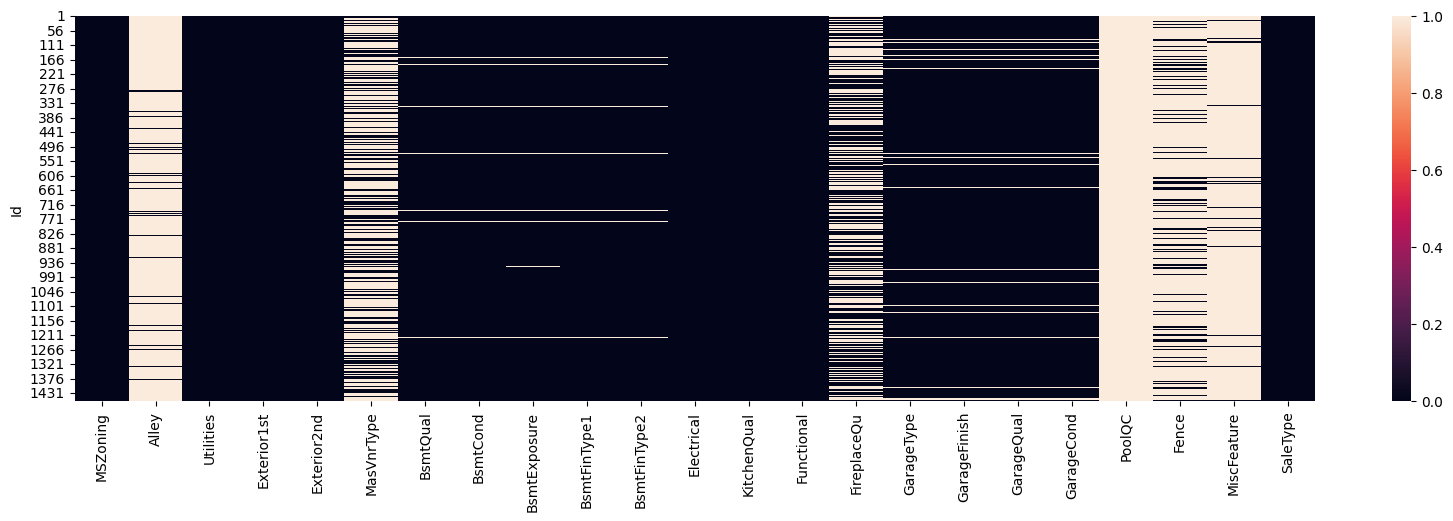

In [38]:
plt.figure(figsize=(20, 5))
sns.heatmap(train_df[null_cat_cols].isnull())

<Axes: ylabel='Id'>

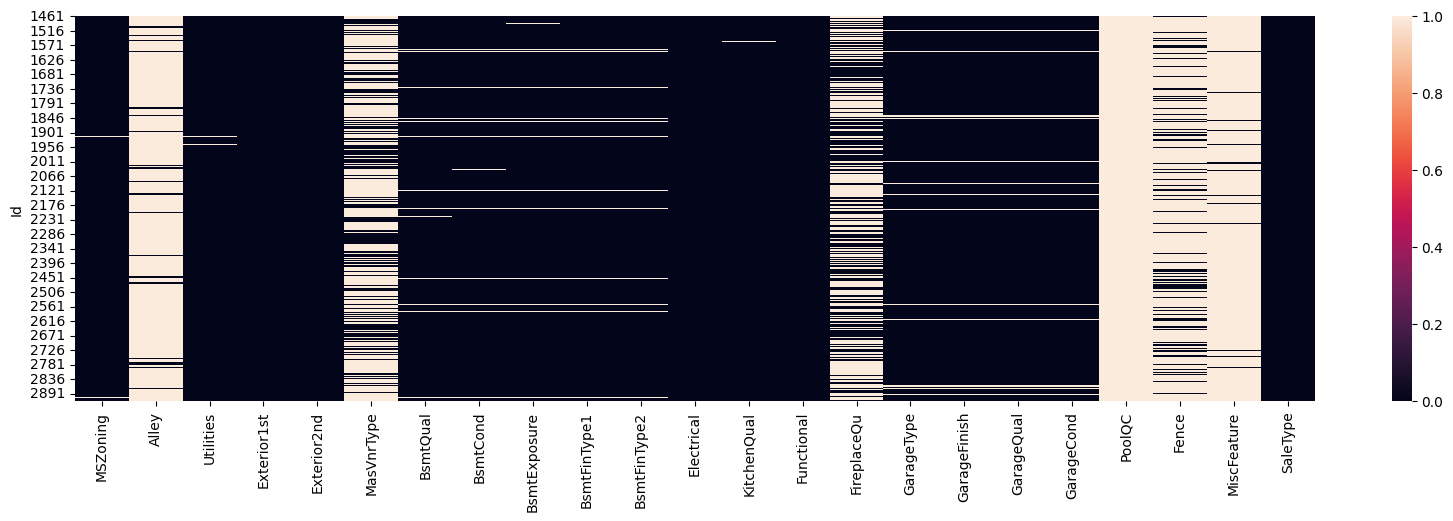

In [39]:
plt.figure(figsize=(20, 5))
sns.heatmap(test_df[null_cat_cols].isnull())

**If the Bsmt and Garage feature groups does not contain 2 or more null values simultaneously, that means miss capturing of the feature when the data was collected. So I want to skip filling the null values when the row only having 1 null value.**

In [40]:
Bsmt_group_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [41]:
#Fill null values which means Does Not Exist
#train
fill_cat_cols = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']
Bsmt_group_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
Garage_group_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

Bsmt_condition_train = train_df[Bsmt_group_cols].isnull().sum(axis=1) > 1
Garage_condition_train = train_df[Garage_group_cols].isnull().sum(axis=1) > 1

train_df[fill_cat_cols] = train_df[fill_cat_cols].fillna('DNE')
train_df.loc[Bsmt_condition_train, Bsmt_group_cols] = train_df.loc[Bsmt_condition_train, Bsmt_group_cols].fillna('DNE')
train_df.loc[Garage_condition_train, Garage_group_cols] = train_df.loc[Garage_condition_train, Garage_group_cols].fillna('DNE')

In [42]:
#Test

Bsmt_condition_test = test_df[Bsmt_group_cols].isnull().sum(axis=1) > 1
Garage_condition_test = test_df[Garage_group_cols].isnull().sum(axis=1) > 1

test_df[fill_cat_cols] = test_df[fill_cat_cols].fillna('DNE')
test_df.loc[Bsmt_condition_test, Bsmt_group_cols] = test_df.loc[Bsmt_condition_test, Bsmt_group_cols].fillna('DNE')
test_df.loc[Garage_condition_test, Garage_group_cols] = test_df.loc[Garage_condition_test, Garage_group_cols].fillna('DNE')

In [43]:
#fill remaining null values with mode
#train
for col in null_cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
#test
for col in null_cat_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

**Handling null values in numerical columns**

<Axes: ylabel='Id'>

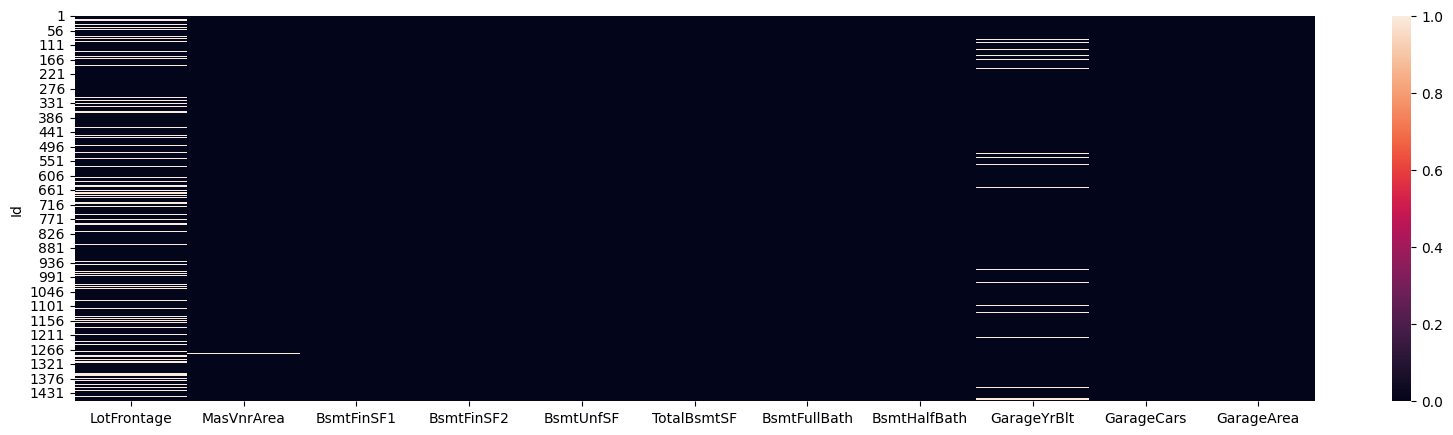

In [44]:
plt.figure(figsize=(20, 5))
sns.heatmap(train_df[null_num_cols].isnull())

<Axes: ylabel='Id'>

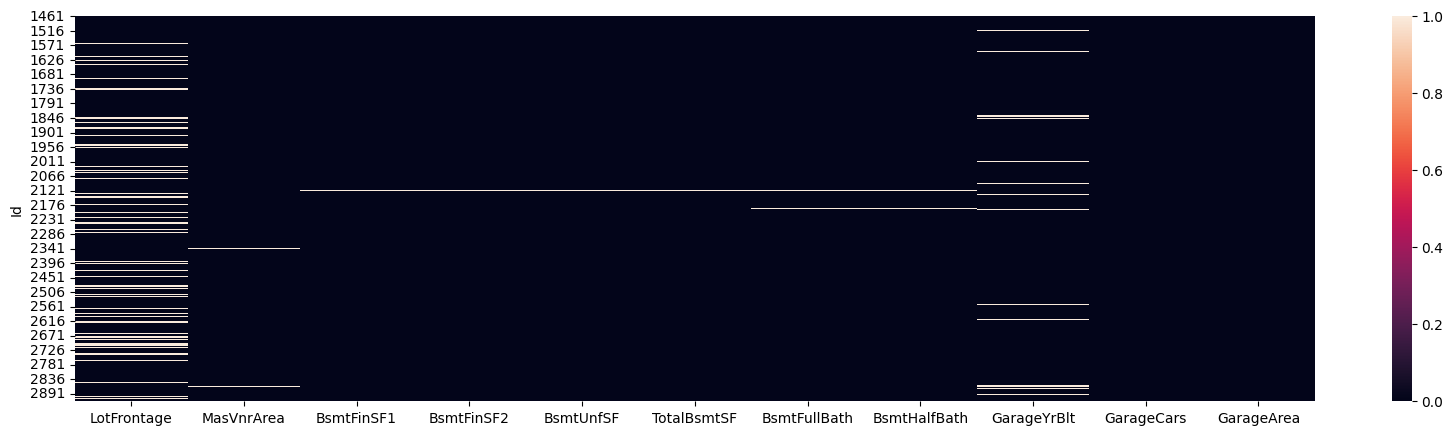

In [45]:
plt.figure(figsize=(20, 5))
sns.heatmap(test_df[null_num_cols].isnull())

**null in GarageYrBlt means DNE, so fill with YearRemodAdd, and LotFrontage,MasVnrArea, Bsmts with 0.**

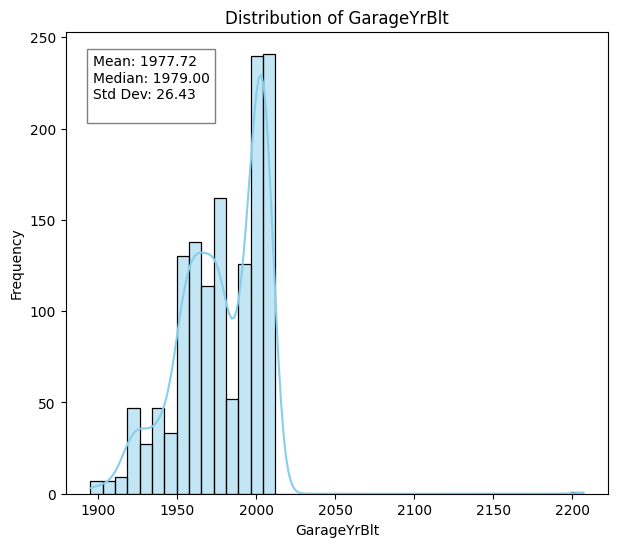

In [46]:
distribution_plot(test_df, 'GarageYrBlt')

In [47]:
print(null_num_cols)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [48]:
#fill null values in numerical columns
fill_zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'LotFrontage', 'GarageCars', 'GarageArea']
#train
train_df[fill_zero_cols] = train_df[fill_zero_cols].fillna(0)
train_df.loc[train_df['GarageYrBlt'].isnull()==True, 'GarageYrBlt'] = train_df.loc[train_df['GarageYrBlt'].isnull()==True, 'YearRemodAdd']

#test
test_df[fill_zero_cols] = test_df[fill_zero_cols].fillna(0)
test_df.loc[test_df['GarageYrBlt'].isnull()==True, 'GarageYrBlt'] = test_df.loc[test_df['GarageYrBlt'].isnull()==True, 'YearRemodAdd']

In [49]:
#Update full_df
full_df = pd.concat([train_df.drop('SalePrice', axis=1), test_df])

# Encoding

In [50]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype == 'object']
#count cardinality
train_df[cat_cols].nunique()

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

In [51]:
#Feature having intrinsic order
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType1', 'HeatingQC',
           'KitchenQual', 'Functional', 'FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'PoolQC', 'Fence']
nominal_cols = list(set(cat_cols) - set(ord_cols))

#separate nominal feature into low and high of cardinality
high_nominal_cols = [col for col in nominal_cols if train_df[col].nunique() > 8] #Do frequency encoding
low_nominal_cols = list(set(nominal_cols) - set(high_nominal_cols)) #Do One-Hot Encoding

In [52]:
#Ordinal Encoding
#Ordering
order_map = {
    'DNE':-1, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4,
    'No':0, 'Mn':1, 'Av':2,
    'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5,
    'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7,
    'RFn':1, 'Fin':2,
    'N':0, 'P':1, 'Y':2,
    'MnWw':0, 'GdWo':1, 'MnPrv':2, 'GdPrv':3
}
enc_train_df = train_df.copy()
enc_test_df = test_df.copy()
for col in ord_cols:
    enc_train_df[col] = train_df[col].map(order_map)
    enc_test_df[col] = test_df[col].map(order_map)


In [53]:
#Frequency Encoding
for col in high_nominal_cols:
    enc_train_df[col] = train_df[col].map(full_df[col].value_counts())
    enc_test_df[col] = test_df[col].map(full_df[col].value_counts()) #use full df to count

enc_train_df[high_nominal_cols].head()

,SaleType,Condition1,Exterior2nd,Exterior1st,Neighborhood
Id,,,,,
1,2526,2511,1015,1026,267
2,2526,164,447,450,24
3,2526,2511,1015,1026,267
4,2526,2511,81,411,103
5,2526,2511,1015,1026,71


In [54]:
enc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [55]:
enc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

In [56]:
#One-Hot Encoding
enc_full_df = pd.concat([enc_train_df.drop('SalePrice', axis=1), enc_test_df], axis=0)
enc_full_df = pd.get_dummies(enc_full_df, columns=low_nominal_cols)
target_sr = enc_train_df['SalePrice']

enc_train_df = enc_full_df.iloc[:1460]
enc_train_df['SalePrice'] = target_sr
enc_test_df = enc_full_df.iloc[1460:]

C:\Users\Issei\AppData\Local\Temp\ipykernel_22384\2717681508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enc_train_df['SalePrice'] = target_sr


In [57]:
enc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Columns: 169 entries, MSSubClass to SalePrice
dtypes: bool(111), float64(11), int64(47)
memory usage: 831.2 KB


In [58]:
enc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Columns: 168 entries, MSSubClass to Electrical_SBrkr
dtypes: bool(111), float64(11), int64(46)
memory usage: 819.3 KB


In [59]:
enc_train_df.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,267,2511,7,5,2003,2003,1026,...,False,False,False,False,False,False,False,False,True,208500
2,20,80.0,9600,24,164,6,8,1976,1976,450,...,False,False,False,False,False,False,False,False,True,181500
3,60,68.0,11250,267,2511,7,5,2001,2002,1026,...,False,False,False,False,False,False,False,False,True,223500
4,70,60.0,9550,103,2511,7,5,1915,1970,411,...,False,False,False,False,False,False,False,False,True,140000
5,60,84.0,14260,71,2511,8,5,2000,2000,1026,...,False,False,False,False,False,False,False,False,True,250000


# Model Selection

In [60]:
# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGB': XGBRegressor(),
    'LightGB': LGBMRegressor(verbose=-1)
}

# Dictionary to store results
results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2 Score': []}

# Splitting the dataset into training and validation sets
X = enc_train_df.drop(['SalePrice'], axis=1)
y = enc_train_df['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Loop through each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    model_pred = model.predict(X_valid)
    
    # Calculate regression metrics
    mae = mean_absolute_error(y_valid, model_pred)
    mse = mean_squared_error(y_valid, model_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, model_pred)
    
    # Store the results
    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)

# Convert the results dictionary to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

print(results_df)


               Model           MAE           MSE          RMSE  R2 Score
0  Linear Regression  23812.057030  3.277011e+09  57245.180206  0.525473
1      Random Forest  17080.984041  1.089299e+09  33004.534976  0.842264
2                SVR  55543.231326  7.241333e+09  85096.024774 -0.048580
3                XGB  18103.952617  1.034826e+09  32168.711184  0.850152
4            LightGB  17122.282645  1.058384e+09  32532.813085  0.846741


# Hyperparameter Tuning

In [61]:
# Import necessary libraries
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the Optuna objective function for XGB tuning
def xgb_objective(trial):
    # Define parameter search space
    xgb_params = {
        'objective': 'reg:squarederror',  # Regression objective
        'eval_metric': 'rmse',            # Use RMSE as the evaluation metric
        'n_estimators': trial.suggest_int('n_estimators', 400, 800),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.7),
        'max_depth': trial.suggest_int('max_depth', 50, 110),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
    }

    # Perform cross-validation with RMSE as evaluation metric
    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv_results = xgb.cv(
        xgb_params,
        dtrain,
        num_boost_round=xgb_params['n_estimators'],
        nfold=5,
        early_stopping_rounds=10,
        seed=0,
        as_pandas=True
    )

    # Get the best RMSE score from cross-validation
    best_rmse = cv_results['test-rmse-mean'].min()
    return best_rmse

# Start the optimization with Optuna
xgb_study = optuna.create_study(direction="minimize")  # Minimizing RMSE
xgb_study.optimize(xgb_objective, n_trials=500, n_jobs=-1)

# Retrieve best parameters
xgb_best_params = xgb_study.best_params
print("Best parameters:", xgb_best_params)

# Train the XGBRegressor model with the optimized parameters
xgb_model = xgb.XGBRegressor(**xgb_best_params)
xgb_model.fit(X_train, y_train)

# Validate on the validation set
xgb_y_pred = xgb_model.predict(X_valid)

# Calculate RMSE for the validation set
xgb_rmse = np.sqrt(mean_squared_error(y_valid, xgb_y_pred))
print("Validation RMSE:", xgb_rmse)


[I 2024-11-13 13:35:02,718] A new study created in memory with name: no-name-a35434b4-0d3d-4b2c-89fc-c46dc1a7ea3f
[I 2024-11-13 13:35:06,017] Trial 12 finished with value: 39991.740919739044 and parameters: {'n_estimators': 577, 'learning_rate': 0.531146805876916, 'max_depth': 107, 'colsample_bytree': 0.4072591534047153, 'min_child_weight': 5, 'reg_alpha': 0.00564796254694028, 'subsample': 0.13192897408021356}. Best is trial 12 with value: 39991.740919739044.
[I 2024-11-13 13:35:06,123] Trial 17 finished with value: 36851.07088763939 and parameters: {'n_estimators': 604, 'learning_rate': 0.582258593552096, 'max_depth': 95, 'colsample_bytree': 0.25454044361117756, 'min_child_weight': 14, 'reg_alpha': 0.000922965902243429, 'subsample': 0.3376257415709595}. Best is trial 17 with value: 36851.07088763939.
[I 2024-11-13 13:35:06,459] Trial 13 finished with value: 41896.936057039 and parameters: {'n_estimators': 789, 'learning_rate': 0.698755213994078, 'max_depth': 86, 'colsample_bytree': 0.

Best parameters: {'n_estimators': 600, 'learning_rate': 0.010098811280088228, 'max_depth': 89, 'colsample_bytree': 0.5938369223064176, 'min_child_weight': 8, 'reg_alpha': 7.980821691489603e-07, 'subsample': 0.3670333518725616}
Validation RMSE: 32022.302739973333


**1st Trial**
* Best parameters: {'n_estimators': 486, 'learning_rate': 0.03459388557443997, 'max_depth': 88, 'colsample_bytree': 0.8150870733689124, 'min_child_weight': 8, 'reg_alpha': 1.8865072785168192e-05, 'subsample': 0.3071966558771691}
* Validation RMSE: 33256.02137197157

**2nd Trial**
* Best parameters: {'n_estimators': 729, 'learning_rate': 0.047675417170649895, 'max_depth': 72, 'colsample_bytree': 0.6550038531396545, 'min_child_weight': 8, 'reg_alpha': 0.00023083057224376687, 'subsample': 0.27090458139673224}
* Validation RMSE: 33065.56553111881

**3rd Trial**
* Best parameters: {'n_estimators': 600, 'learning_rate': 0.010098811280088228, 'max_depth': 89, 'colsample_bytree': 0.5938369223064176, 'min_child_weight': 8, 'reg_alpha': 7.980821691489603e-07, 'subsample': 0.3670333518725616}
* Validation RMSE: 32022.302739973333

In [62]:
param1 = {'n_estimators': 486, 
          'learning_rate': 0.03459388557443997, 
          'max_depth': 88, 
          'colsample_bytree': 0.8150870733689124, 
          'min_child_weight': 8, 
          'reg_alpha': 1.8865072785168192e-05, 
          'subsample': 0.3071966558771691
         }

model1 = xgb.XGBRegressor(**param1)
model1.fit(X,y)
pred1 = model1.predict(enc_test_df)

# Save test predictions to file
output = pd.DataFrame({'Id': enc_test_df.index,
                       'SalePrice': pred1})
# output.to_csv('submission.csv', index=False)